<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем необходимые для работы библиоткеи.

In [309]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Первым шагом рассмотрим общую информацию о данных в таблице. Прочитаем её из .csv-файла и выведем общую информацию.

In [310]:
data = pd.read_csv('/datasets/real_estate_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                           --------------  ----- 
 0   total_images	last_price	total_area	first_day_exposition	rooms	ceiling_height	floors_total	living_area	floor	is_apartment	studio	open_plan	kitchen_area	balcony	locality_name	airports_nearest	cityCenters_nearest	parks_around3000	parks_nearest	ponds_around

Как видим, что-то пошло не так. Посмотрим на первые пять строк таблицы:

In [311]:
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные не отображаются, а те, что есть, склеены в одну строку. Однако, можно заметить, что значения разделены знаком '\t'.

Наш файл с данными хранится в формате .csv, что расшифровывается как Comma-Separated Values, или значения, разделённые запятыми. Однако, вместо них могут быть и точки с запятой, знаки табуляции или другие символы. В нашем случае, это символ **'\t'**. Укажем его как разделитель, при выгрузке данных.

In [312]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Теперь наши данные приобрели читаемый вид и готовы для исследования. Рассмотрим **общую информацию:**

1. В двух столбцах тип данных "bool". Это колонки с информацией, является ли квартира **студией**, или имеет **свободную планировку**. Значения "Да" - "Нет", или "True" - "False", являются булевыми, поэтому тип данных "bool" уместен. К нему же стоит привести значения столбца **"is_apartment"** - является ли квартира студией.


2. Столбец **first_day_exposition**, указывающий дату публикации объявления, стоит привести к формату **"дата-время"**.


3. **Количество комнат и этаж** - целочисленные значения. Скорее всего, в объявлении не будет две с половиной комнаты, или полтора этажа. К этому типу данных стоит подвести столбец с **наличием балкона**. Напрашивается булев тип - есть балкон, или нет - но балконов может быть несколько и точно не полтора :) Следом идёт общее **количество этажей в доме** и сколько дней было **размещено объявление**.


4. По оставшимся столбцам пока нет вопросов. Число с плавающей точкой, **"float64"**, подходит к значениям, хранящимся в них.

Выведем первые пять строк таблицы:

In [313]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Таблица растянута в ширину, два столбца не попали в отображаемые, есть пропущенные значения. Для удобства, можно переименовать столбцы и привести их к единому регистру. Всеми исправлениями займёмся в предобработке данных.

Посмотрим на общую статистику по таблице:

In [314]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Отрицательных значений не наблюдается. Есть "ноль" комнат, однако, это может быть как ошибка данных, так и квартира-студия. Вызывают вопрос потолки в один метр и кухня в полтора. 


Нужно приступать к предобработке данных.

## Предобработка данных

Для удобства, **переименуем** столбцы и сохраним новые значения.

In [315]:
data.rename(columns={
    'cityCenters_nearest': 'to_center_dist', 'parks_around3000': 'parks_around_3km', 'ponds_around3000': 'ponds_around_3km'
}, inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,to_center_dist,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


На этом этапе появилась идея, что парки и пруды в радиусе трёх километров, можно привести к целочисленному значению.

Посмотрим **пропуски** в таблице:

In [316]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
to_center_dist           5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Первое значение - высота потолков. Важный параметр - много пропусков. Так оставлять нельзя. Для начала, посчитаем среднее значение высоты.

In [317]:
data.ceiling_height.mean()

2.7714988968559835

Обратимся к информации из открытых источников: 


"Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра."


Как раз то, что нам нужно. Но, для более аккуратного подсчёта, используем медиану. Заполним пропуски.

In [318]:
data.ceiling_height.median()

2.65

In [319]:
data.loc[data.ceiling_height.isna(), 'ceiling_height'] = data.ceiling_height.median()

In [320]:
data.ceiling_height.isna().sum()

0

Далее. В столбце 'is_apartment' очень много пропусков. Оно приближается к общему количеству строк в таблице.

In [321]:
data.shape

(23699, 22)

Посчитаем уникальные значения в столбце, не исключая пропуски.

In [322]:
data.is_apartment.value_counts(dropna=False)

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64

Данные в столбце должны иметь булев тип - "0" или "1". Где "0" - это, условно, "не апартаменты". 


Скорее всего, пропущенные значения как раз являются "0". Заполним пропуски и приведём столбец к булеву типу. 

In [323]:
data.loc[data.is_apartment.isna(), 'is_apartment'] = 0

In [324]:
data.loc[data.is_apartment != 0, 'is_apartment'] = 1

In [325]:
data.is_apartment.value_counts(dropna=False)

0    23649
1       50
Name: is_apartment, dtype: int64

Теперь булев тип:

In [326]:
data = data.astype({'is_apartment': 'bool'})

In [327]:
data.is_apartment.value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

Затронем пропуски в площади кухни 'kitchen_area'. Помимо настоящих пропусков, связанных с ошибками в выгрузке данных, составлении таблицы и так далее, скорее всего, отсутствующие значения указывают на тип квартиры - "студия". Где жилая площадь и кухня объеденены. 

Прверим это. Сгруппируем таблицу по "студии" и посчитаем количество значений в столбце "кухни".

In [328]:
data.groupby('studio', as_index=False).kitchen_area.count()

,studio,kitchen_area
0,False,21421
1,True,0


Как видим, у студий не указана площадь кухни. Можно заполнить пропуски нулями.

In [329]:
data.kitchen_area.isna().sum()

2278

In [330]:
data.loc[data.kitchen_area.isna(), 'kitchen_area'] = 0

In [331]:
data.kitchen_area.isna().sum()

0

Пропусков больше нет.

На очереди балконы. Данные о пропусках можно смело читать "в лоб". Нет пропуска - есть балкон. Есть пропуск - балкона нет. 


Заменяем нулями.

In [332]:
data.loc[data.balcony.isna(), 'balcony'] = 0

In [333]:
data.balcony.isna().sum()

0

Пропуски в последующих столбцах оставим как есть. Эти значения получены автоматически, на основе картографических данных, поэтому пропущенное будем принимать за "нет". Например, "ближайший аэропорт", или "ближайший парк".


Но нельзя оставлять не рассмотренным последний столбец - сколько дней было размещено объявление (от публикации до снятия). Отсутсвующие значения - это действительно пропуски, или, может быть, объявление ещё активно? 


Проверим зависимость от столбца с датой размещения. 

Для начала, приведём столбец к интересующему нас **типу данных "дата-время"**.

In [334]:
data['first_day_exposition'] = pd.to_datetime(data.first_day_exposition)

Отсортируем по году и посмотрим, сколько всего объявлений было сделано.

In [335]:
data.first_day_exposition.dt.year.value_counts().sort_index(ascending=False)

2019    2879
2018    8519
2017    8190
2016    2783
2015    1191
2014     137
Name: first_day_exposition, dtype: int64

2019 год - последний в нашей таблице. Сделаем по нему срез, в котором укажем отсутствующие значения в столбце 'days_exposition'

Выведем первые пять строк:

In [336]:
data.query('first_day_exposition.dt.year == 2019 and days_exposition != days_exposition')\
.sort_values(by='first_day_exposition', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,to_center_dist,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
2178,10,5100000.0,51.0,2019-05-03,1,2.65,9.0,15.0,2,False,...,25.0,0.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12343,12,2890000.0,48.8,2019-05-03,2,2.55,5.0,29.4,1,False,...,7.2,0.0,городской посёлок Рощино,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21887,0,5600000.0,61.6,2019-05-03,3,2.50,9.0,42.0,5,False,...,8.3,0.0,Санкт-Петербург,36326.0,10641.0,1.0,637.0,0.0,NaN,NaN
3254,16,8800000.0,80.0,2019-05-03,3,2.80,17.0,31.0,15,False,...,27.0,2.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4450,13,3500000.0,34.6,2019-05-03,1,2.50,5.0,19.4,3,False,...,7.3,2.0,Пушкин,13107.0,25261.0,1.0,361.0,0.0,NaN,NaN


Посмотрим на общее количество строк среза:

In [337]:
data.query('first_day_exposition.dt.year == 2019 and days_exposition != days_exposition').shape

(1796, 22)

Посчитаем процент:

In [338]:
ads_2019_total = len(data[data['first_day_exposition'].dt.year == 2019])
ads_2019_days_exp_empty = len(data.query('first_day_exposition.dt.year == 2019 and days_exposition != days_exposition'))
ads_2019_ratio = ads_2019_days_exp_empty / ads_2019_total

print('Количество пропущенных значений за 2019 год составляет: {:.1%}'\
      .format(ads_2019_ratio)
     )

Количество пропущенных значений за 2019 год составляет: 62.4%


Больше половины. Будем считать, что это активные объявления. 

Тем не менее, пропуски следует чем-то заполнить. Например - медианой длительности размещения объявлений.

Построим диаграмму размаха по столбцу 'days_exposition':

<AxesSubplot:>

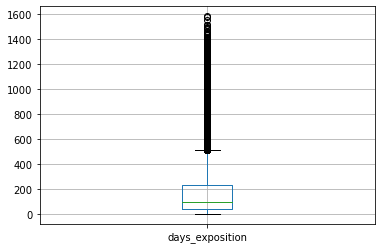

In [339]:
data.days_exposition.plot(kind='box', grid=True)

Как видим, выбросы начинаются после объявлений, активных более пятисот дней. Рискнём откинуть выбросы и сделаем срез, который ограничим пятью стами дней.

<AxesSubplot:>

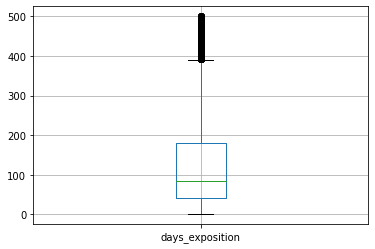

In [340]:
days_exposition_slice = data.query('days_exposition <= 500')
days_exposition_slice.days_exposition.plot(kind='box', grid=True)

Посчитаем медиану:

In [341]:
days_exposition_slice.days_exposition.median()

84.0

Заполним этим значением пропуски в столбце с количеством дней размещения.

In [342]:
data.days_exposition.fillna(days_exposition_slice.days_exposition.median(), inplace=True)
data.days_exposition.isna().sum()

0

Выведем первые пять строк таблицы и посмотрим на общий результат:

In [343]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,to_center_dist,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,84.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


В целом, предобработка прошла успешно. Можно приступать к рассчётам.

## Расчёты и добавление результатов в таблицу

Для начала, посчитаем **стоимость квадратного метра** и добавим её в новый столбец.

In [344]:
data['square_meter_price'] = round((data.last_price / data.total_area), 2)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,to_center_dist,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,square_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,84.0,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


Добавим столбцы **дня недели, месяца, года**.

In [345]:
data['week_day'] = data.first_day_exposition.dt.day_name()
data['month'] = data.first_day_exposition.dt.month_name()
data['year'] = data.first_day_exposition.dt.year

In [346]:
data[['first_day_exposition', 'week_day', 'month', 'year']].head()

,first_day_exposition,week_day,month,year
0,2019-03-07,Thursday,March,2019
1,2018-12-04,Tuesday,December,2018
2,2015-08-20,Thursday,August,2015
3,2015-07-24,Friday,July,2015
4,2018-06-19,Tuesday,June,2018


Создадим **столбец с категорией этажа** - первый, одноэтажное жильё, последний, другой.

In [347]:
def floor_cat(floor_numb):
    if floor_numb['floor'] == 1:
        return 'Первый этаж'
    if floor_numb['floors_total'] == 1:
        return 'Одноэтажное жильё'
    if floor_numb['floor'] == floor_numb['floors_total']:
        return 'Последний этаж'
    if floor_numb['floors_total'] != floor_numb['floors_total']:
        return 'Неизвестно'
    return 'Другой этаж'
        
    
data['floor_category'] = data.apply(floor_cat, axis=1)
data.floor_category.value_counts()

Другой этаж       17363
Последний этаж     3336
Первый этаж        2917
Неизвестно           83
Name: floor_category, dtype: int64

Посчитаем **соотношение жилой и общей площади, а также отношение площади кухни к общей**.

In [348]:
data['living_to_total'] = data.living_area / data.total_area
data.living_to_total.fillna(0, inplace=True) #сразу заполним пропуски нулём
data.living_to_total = data.living_to_total.apply('{:.1%}'.format)

data['kitchen_to_total'] = data.kitchen_area / data.total_area
data.kitchen_to_total = data.kitchen_to_total.apply('{:.1%}'.format)

data[['living_to_total', 'kitchen_to_total']].head()

,living_to_total,kitchen_to_total
0,47.2%,23.1%
1,46.0%,27.2%
2,61.2%,14.8%
3,0.0%,0.0%
4,32.0%,41.0%


In [349]:
data.living_to_total.value_counts().head()

0.0%     1903
50.0%     341
60.0%     238
66.7%     202
56.2%     172
Name: living_to_total, dtype: int64

In [350]:
data.kitchen_to_total.value_counts().head()

0.0%     2278
20.0%     250
13.3%     233
14.3%     227
15.6%     225
Name: kitchen_to_total, dtype: int64

Все указывают общую площадь, но не все жилую, или площадь кухни. Отсутствующие значения могут быть студиями, квартирами со свободной планировкой, или апартаментами. И, конечно же, просто не указанные человеком данные.

## Исследовательский анализ данных

Рассмотрим цену, площадь, число комнат, высоту потолков.

Построим **гистограмму цены**.

Для начала, выведем количество уникальных значений.

In [351]:
data.last_price.value_counts().head(15)

4500000.0    342
3500000.0    291
4000000.0    260
4300000.0    260
4200000.0    259
3600000.0    257
3300000.0    244
3800000.0    240
3200000.0    238
3700000.0    234
4100000.0    233
3400000.0    227
5500000.0    227
3900000.0    221
3100000.0    220
Name: last_price, dtype: int64

Как видим, большинство значений находится в районе 3-5 млн.

Проверим это на гистограмме:

Text(0, 0.5, 'Количество объявлений')

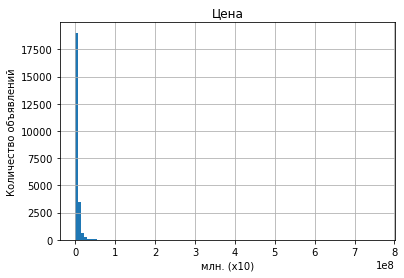

In [352]:
data.last_price.plot(kind='hist', bins=100, grid=True, title='Цена')
plt.xlabel('млн. (x10)')
plt.ylabel('Количество объявлений')

На общем графике, все значения находятся в диапазоне от 0 до 10 млн. Сделаем срез по этому диапазону.

Text(0, 0.5, 'Количество объявлений')

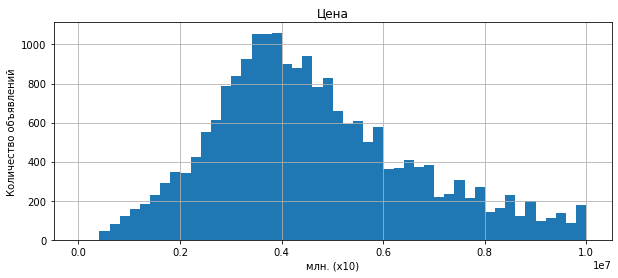

In [353]:
price_slice = data.query('last_price <= 10000000')
price_slice.last_price.plot(kind='hist', bins=50, grid=True, title='Цена', figsize=(10, 4))
plt.xlabel('млн. (x10)')
plt.ylabel('Количество объявлений')

Построим диаграмму размаха:

<AxesSubplot:>

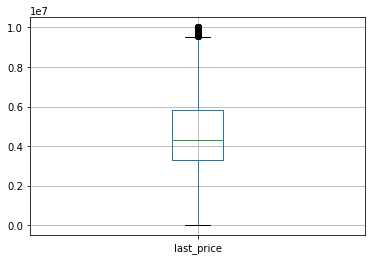

In [354]:
price_slice.last_price.plot(kind='box', grid=True)

Медианное значение между четырьмя и пятью миллионами. Узнаем точную цифру.

In [355]:
price_slice.last_price.median()

4320000.0

**Медианная стоимость квартиры - 4.3 млн.**

Изучим **площадь квартиры**.

Text(0, 0.5, 'Количество объявлений')

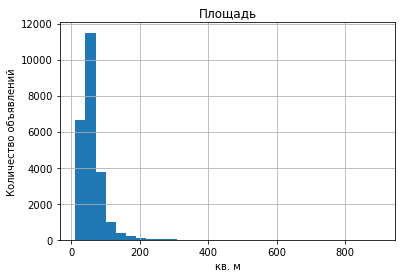

In [356]:
data.total_area.plot(kind='hist', bins=30, grid=True, title='Площадь')
plt.xlabel('кв. м')
plt.ylabel('Количество объявлений')

Основной диапазон значений, примерно, до 150 кв. метров. Делаем срез по нему.

Text(0, 0.5, 'Количество объявлений')

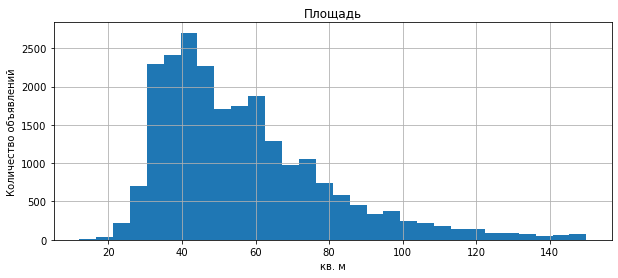

In [357]:
total_area_slice = data.query('total_area <= 150')
total_area_slice.total_area.plot(kind='hist', bins=30, grid=True, title='Площадь', figsize=(10, 4))
plt.xlabel('кв. м')
plt.ylabel('Количество объявлений')

<AxesSubplot:>

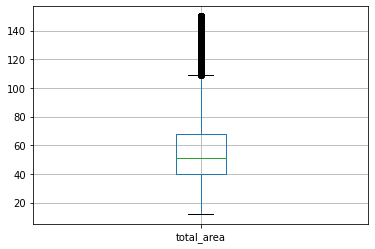

In [358]:
total_area_slice.total_area.plot(kind='box', grid=True)

На срезе, выбросы начинаются после 110 кв.м.

In [359]:
total_area_slice.total_area.median()

51.0

**Площадь по медиане равна 51 кв.м.** Половина размещённых квартир с меньшей площадью, половина - с большей.

Узнаем **число комнат** в наших объявлениях.

Text(0, 0.5, 'Количество объявлений')

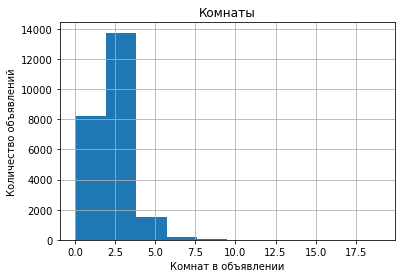

In [360]:
data.rooms.plot(kind='hist', bins=10, grid=True, title='Комнаты')
plt.xlabel('Комнат в объявлении')
plt.ylabel('Количество объявлений')

Тут, скорее всего, чудес не будет. Посчитаем медиану, не делая срез под датафрейму.

In [361]:
data.rooms.median()

2.0

В основном - **двухкомнатные квартиры**. Такой результат нас устроит.

А что по **потолкам**? Как мы узнали ранее, средняя высота потолков в России 2.5 метра. Сделаем срез, для более наглядного построения гистограммы.

Text(0, 0.5, 'Количество объявлений')

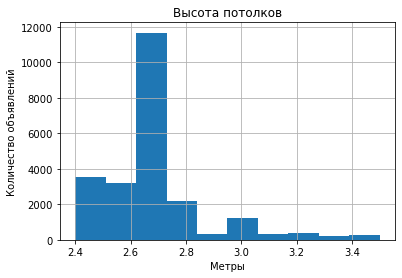

In [362]:
ceiling_height_slice = data.query('2.4 <= ceiling_height <= 3.5')
ceiling_height_slice.ceiling_height.plot(kind='hist', bins=10, grid=True, title='Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество объявлений')

Напомним, что: "Сегодня минимальной нормой в России считается высота потолка 2,4 метра. В новостройках обычно это значение находится в пределах 2,5-2,7 метра."

Всё сходится. Но, есть и квартиры "для высоких" - с потолками 3 метра и более. Возможно, центр города и старый фонд, "сталинские" дома, или элитные новостройки. 

Изучим длительность продажи квартиры. Построим гистограмму по столбцу количества дней, когда объявление было активно.

Text(0, 0.5, 'Количество объявлений')

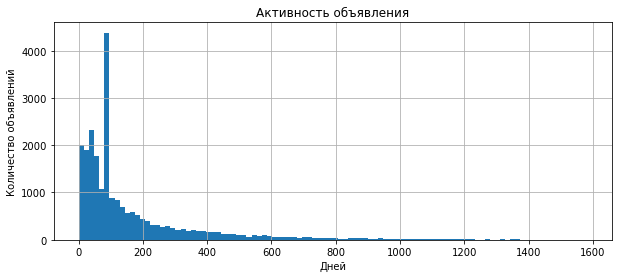

In [363]:
data.days_exposition.plot(kind='hist', bins=100, grid=True, title='Активность объявления', figsize=(10, 4))
plt.xlabel('Дней')
plt.ylabel('Количество объявлений')

Ранее, при заполнении пропусков, мы уже считали медианное время активности объявления. Получилось 84 дня. И, как видно на гистограмме, пик находится как раз в пределах этого значения. 

Также, на диаграмме размаха, мы увидели, что большая часть значений находится в диапазоне до 200 дней, а выбросы начинаются после, примерно, 450 - 500 дней размещения объявления. Будем считать, что 500 дней и более - это необычно долгое время размещения объявления. 

<AxesSubplot:>

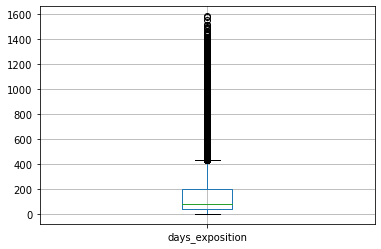

In [364]:
data.days_exposition.plot(kind='box', grid=True)

Сделаем срез, с максимумом в 500 дней и посмотрим результат.

Text(0, 0.5, 'Количество объявлений')

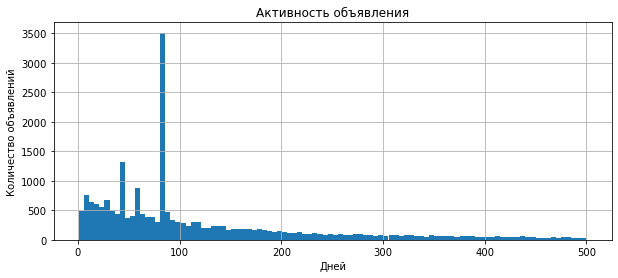

In [365]:
days_exposition_sliced = data.query('days_exposition <= 500')
days_exposition_sliced.days_exposition.plot(kind='hist', bins=100, grid=True, title='Активность объявления', figsize=(10, 4))
plt.xlabel('Дней')
plt.ylabel('Количество объявлений')

In [366]:
days_exposition_sliced.days_exposition.median()

84.0

Медианное значение не изменилось. Половина объявлений активны больше этого значения, а половина - меньше. А что со средним?

In [367]:
days_exposition_sliced.days_exposition.mean()

120.89248291571754

Оно больше медианы, но не намного. Значит, в нашем срезе, ещё присутствуют достаточно высокие значения, однако, на медиану они не повлияли.

С необычно долгими значениями мы разобрались. А что с очень быстрыми? Диаграмма размаха нам в помощь.

<AxesSubplot:>

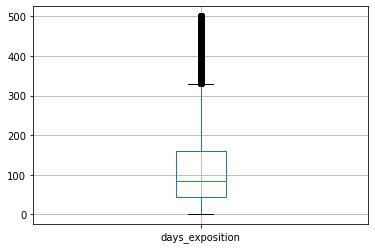

In [368]:
days_exposition_sliced.days_exposition.plot(kind='box', grid=True)

Первый квартиль ограничен 50 днями. Всё, что ниже - это 25% значений. Не много, но и не мало. Нижний "ус" диаграммы упирается в 0, значит есть объявления с нулевым количеством дней размещения.

Посмотрим на ситуацию меньше 50 дней.

In [369]:
days_exposition_min = data.query('days_exposition <= 50')
days_exposition_min.days_exposition.value_counts().sort_index().head(10)

1.0       1
2.0       3
3.0     158
4.0     176
5.0     152
6.0     124
7.0     234
8.0     139
9.0     143
10.0    127
Name: days_exposition, dtype: int64

Ситуации бывают разные и, наверное, продать квартиру по объявлению за один день, тоже возможно, но это точно исключение. На практике, квартира продаётся от трёх недель (26 дней) и дольше. Это связано не только с "чистым" временем продажи - нашли объявление, пришли, посмотрели, понравилось, купили, - но и с различного рода финансовой, социальной и бюрократичесчкой волокитой. Поэтому условимся, что ниже 25 дней - это необычно быстрая продажа.

Добавим наши заключения в таблицу. Создадим столбцы с очень быстрым и очень долгим временем продажи. 

In [370]:
data['too_fast_selling'] = data['days_exposition'] < 25
data['too_slow_selling'] = data['days_exposition'] > 500
data[['days_exposition', 'too_fast_selling', 'too_slow_selling']].head()

,days_exposition,too_fast_selling,too_slow_selling
0,84.0,False,False
1,81.0,False,False
2,558.0,False,True
3,424.0,False,False
4,121.0,False,False


**Изучим, какие факторы больше всего влияют на стоимость квартиры.** 

**Начнём с площади**. Построим диаграмму рассеяния.

(0.0, 30000000.0)

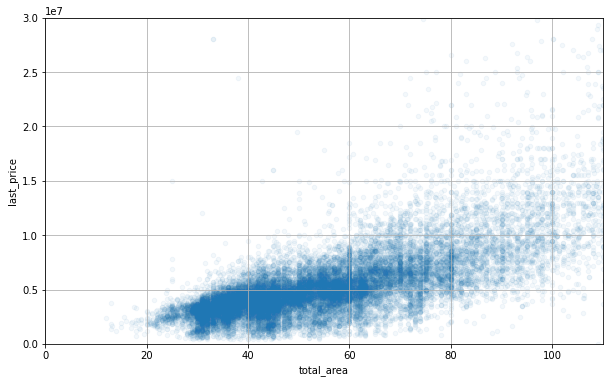

In [371]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05, grid=True, figsize=(10, 6))
plt.xlim(0, 110)
plt.ylim(0, 30000000)

Как видим, в среднем, цена от площади меняется не пропорционально. Безусловно, после 30 кв.м. начинается рост, но он очень сильно растягивается по горизонтальной оси. Площадь растёт, а цена всё равно колеблется около средних значений.

**Цена и количество комнат**.

(-1.0, 10.0)

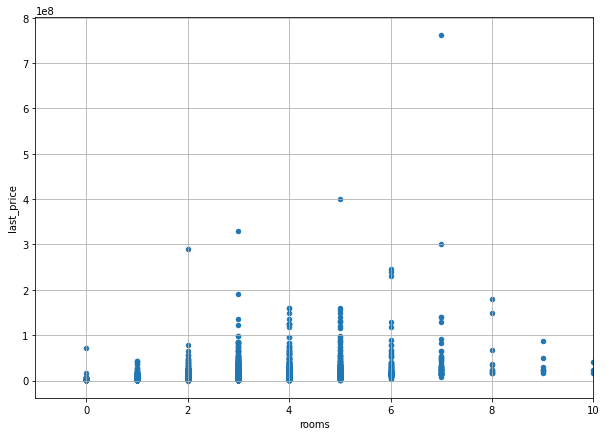

In [372]:
data.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(10, 7))
plt.xlim(-1, 10)

Безусловно, цена растёт с увеличением количества комнат. Но, начиная с трёхкомнатных квартир, видно достижение "потолка" в 10 млн. Конечно, есть квартиры и с более высокой стоимостью, но ограничительная линия чётко прослеживается. После квартир с пятью комнатами, наблюдается даже некоторое снижение цены.

**Этаж** и цена.

<AxesSubplot:xlabel='floor_category'>

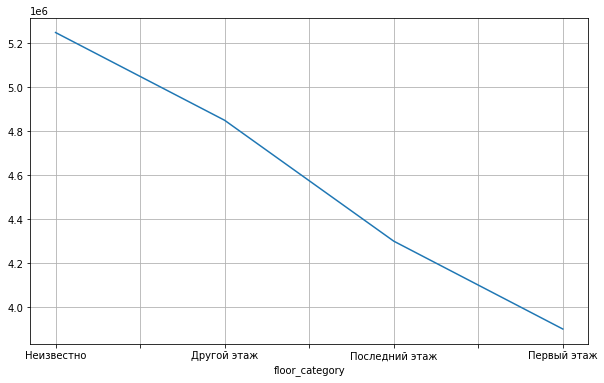

In [373]:
data.groupby('floor_category').last_price.median().sort_values(ascending=False).plot(grid=True, figsize=(10, 6))

Ничего удивительного. **Первый и последний этажи** - самые недорогие. 

Цена и **удалённость от центра**.

(-1.0, 40000.0)

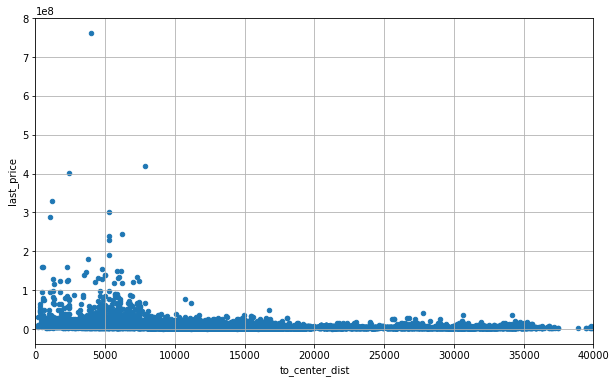

In [374]:
data.plot(x='to_center_dist', y='last_price', kind='scatter', grid=True, figsize=(10, 6))
plt.xlim(-1, 40000)

Чем ближе к центру - тем дороже, но есть любопытный момент. Наибольшая плотность повышения цены наблюдается в районе 5-6 километров. Центр - это, конечно, престижно, но жить от него лучше подальше. Но и не очень далеко :)

**Дни недели** и цена.

<AxesSubplot:xlabel='week_day'>

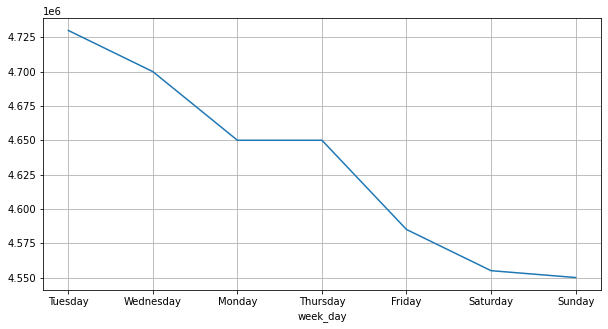

In [375]:
data.groupby('week_day').last_price.median().sort_values(ascending=False).plot(grid=True, figsize=(10, 5))

Самые дешёвые квартиры - по воскресеньям. Во вторник - дороже всего. 

**Цена и времена года**. Построим график медианы цены по месяцам.

<AxesSubplot:xlabel='month'>

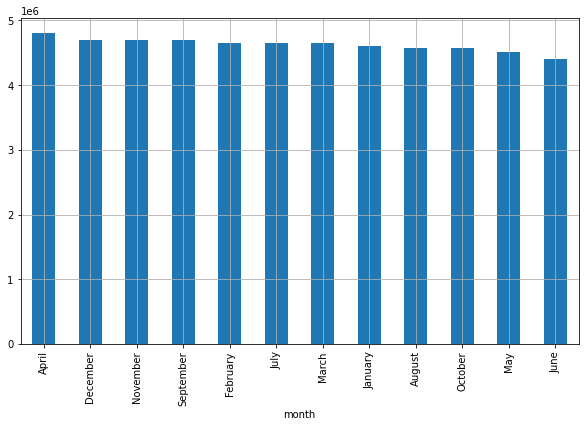

In [376]:
data.groupby('month').last_price.median().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10, 6))

В течение года, колебания выражены не очень сильно, но есть пик в апреле и заметное понижение в мае-июне.

В **каком году** квартиры были дешевле, а трава зеленее.

<AxesSubplot:xlabel='year', ylabel='last_price'>

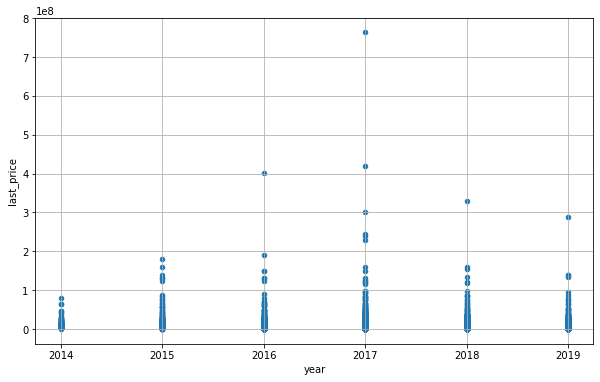

In [377]:
data.plot(x='year', y='last_price', kind='scatter', grid=True, figsize=(10, 6))

Сразу привлекает внимание 2014 год, но это год с наименьшим количеством объявлений.

In [378]:
data.first_day_exposition.dt.year.value_counts().sort_index(ascending=False)

2019    2879
2018    8519
2017    8190
2016    2783
2015    1191
2014     137
Name: first_day_exposition, dtype: int64

Начиная с 2015, количество объявлений неуклонно росло. Как и цена.

Выделим **10 населённых пунктов**, с наибольшим числом объявлений и посчитаем для них среднюю стоимость квадратного метра:

In [379]:
top_localities = data.groupby('locality_name').agg({'square_meter_price': ['count', 'mean']})
top_localities.columns = ['ads_count', 'square_meter_price_mean']
top_localities = top_localities.sort_values(by='ads_count', ascending=False)
top_localities.head(10)

,ads_count,square_meter_price_mean
locality_name,,
Санкт-Петербург,15721,114849.008793
посёлок Мурино,522,85752.189157
посёлок Шушары,440,78677.364318
Всеволожск,398,68654.473970
Пушкин,369,103125.819377
Колпино,338,75424.579112
посёлок Парголово,327,90175.913089
Гатчина,307,68746.146515
деревня Кудрово,299,92473.547559


Из первой десятки, в среднем, самое дорогое жильё в Санкт-Петербурге и городе Пушкин, входящим в его состав. 

Но где же **самый дорогой квадратный метр** и, как следствие, самое дорогое жильё?

In [380]:
sorted_sq_meter_price = data.groupby('locality_name').agg({'square_meter_price': 'mean'})
sorted_sq_meter_price.sort_values(by='square_meter_price', ascending=False).head(5)

,square_meter_price
locality_name,
посёлок Лисий Нос,121616.225000
Зеленогорск,115122.799583
Санкт-Петербург,114849.008793
посёлок Репино,104238.612500
Пушкин,103125.819377


Лисий Нос, Зеленогорск, Репино. Населённые пункты, раскинувшиеся вдоль Финского залива, на курортном направлении. 

А есть варианты для любителей сэкономить? 

**Самые дешёвые варианты**.

In [381]:
sorted_sq_meter_price.sort_values(by='square_meter_price').head(5)

,square_meter_price
locality_name,
деревня Старополье,11206.22
посёлок станции Свирь,11481.48
деревня Вахнова Кара,11688.31
деревня Выскатка,12335.48
поселок Совхозный,12629.13


Если верить Яндекс-картам, Старополье - деревня где-то на Юго-Западе Ленинградской области. Хороший вариант для дауншифтинга. 

Выясним, **что такое "центр"**, расстояние до которого указано в таблице. Где он заканчивается, и начинается "не центр".

Создадим столбец с расстоянием до центра в километрах.

In [382]:
data['to_center_dist_km'] = data.to_center_dist // 1000

Построим график зависимости средней цены от расстояния до центра.

<AxesSubplot:xlabel='to_center_dist_km'>

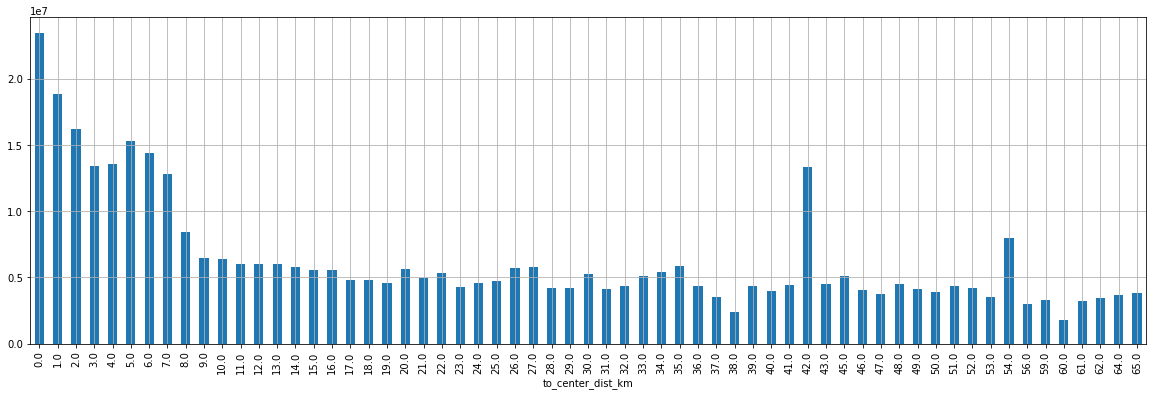

In [383]:
data.groupby('to_center_dist_km').last_price.mean().plot(kind='bar', grid=True, figsize=(20, 6))

Резкий провал после семи километров. Значит это граница "центральной" зоны. 

Узнаем, что происходит с квартирами в центре. Исследуем эту загадочную область. 

In [384]:
data_center = data.query('to_center_dist_km <= 7')
price_slice_center = data_center.query('last_price <= 15000000')

Посмотрим на **цену, в сравнении с остальным городом**.

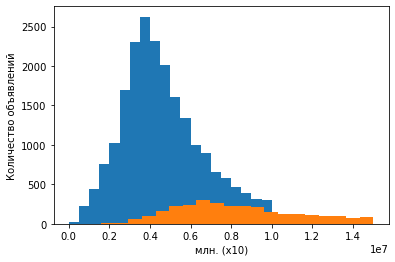

In [385]:
plt.hist(price_slice['last_price'], bins=20)
plt.hist(price_slice_center['last_price'], bins=20)
plt.xlabel('млн. (x10)')
plt.ylabel('Количество объявлений')
plt.show()

Синяя гистограмма - цена по городу. Оранжевая - в центре.

Диаграмма размаха для центра.

<AxesSubplot:>

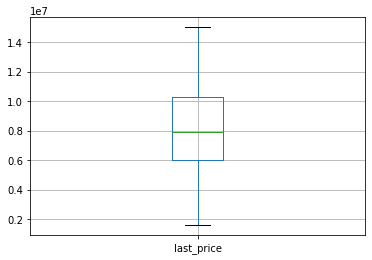

In [386]:
price_slice_center.last_price.plot(kind='box', grid=True)

Первый квартиль на шести миллионах. Основной объём цен начинается с этого значения и заканчивается слека за десять.

In [387]:
price_slice_center.last_price.median()

7900000.0

In [388]:
price_slice.last_price.median()

4320000.0

Медианная цена в центре, в полтора раза выше оной по городу.

Изучим **площадь**.

In [389]:
total_area_center = data_center.query('total_area <= 150')

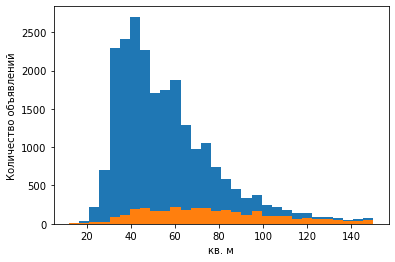

In [390]:
plt.hist(total_area_slice['total_area'], bins=30)
plt.hist(total_area_center['total_area'], bins=30)
plt.xlabel('кв. м')
plt.ylabel('Количество объявлений')
plt.show()

От 40 кв.м и выше. Такая площадь у большинства квартир, предлагаемых в центре. Сравним медианы.

In [391]:
total_area_slice.total_area.median()

51.0

In [392]:
total_area_center.total_area.median()

72.5

В среднем, площадь квартиры в центре, на 20 кв.м. больше, чем по остальному городу.

**Количество комнат** в квартирах в центре.

<AxesSubplot:xlabel='rooms'>

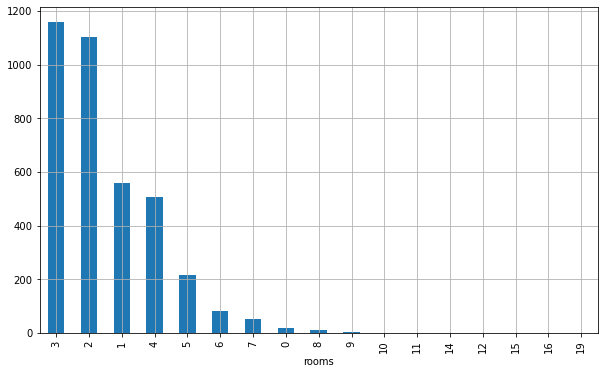

In [393]:
data_center.groupby('rooms').rooms.count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10, 6))

In [394]:
data_center.rooms.median()

3.0

Трёх- и двухкомнатные квартиры - **самые распространённые в центре**.

А что было **по городу**?

<AxesSubplot:xlabel='rooms'>

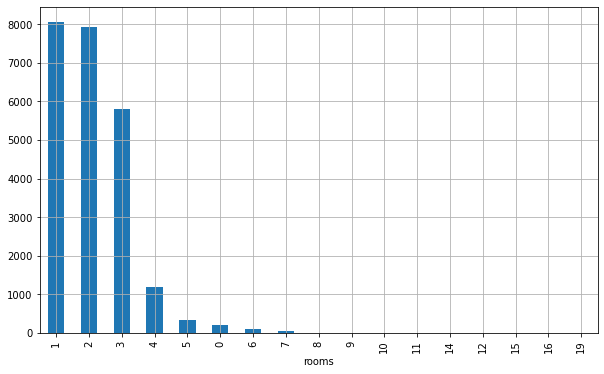

In [395]:
data.groupby('rooms').rooms.count().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10, 6))

In [396]:
data.rooms.median()

2.0

"Однушки" и "двушки" - двигатель торговли.

**Высота потолков** в центре.

<AxesSubplot:ylabel='Frequency'>

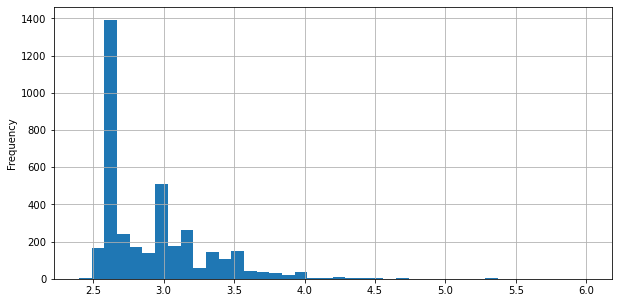

In [397]:
center_ceiling_height = data_center.query('2.4 <= ceiling_height <=10')
center_ceiling_height.ceiling_height.plot(kind='hist', bins=40, grid=True, figsize=(10, 5))

In [398]:
center_ceiling_height.ceiling_height.median()

2.8

In [399]:
center_ceiling_height.ceiling_height.mean()

2.9293422818791197

В среднем, потолки в центре выше, чем по городу. Их значение приближается к трём метрам.

Узнаем, какие факторы больше всего влияют на **стоимость квартиры в центре**.

**Площадь.**

(0.0, 30000000.0)

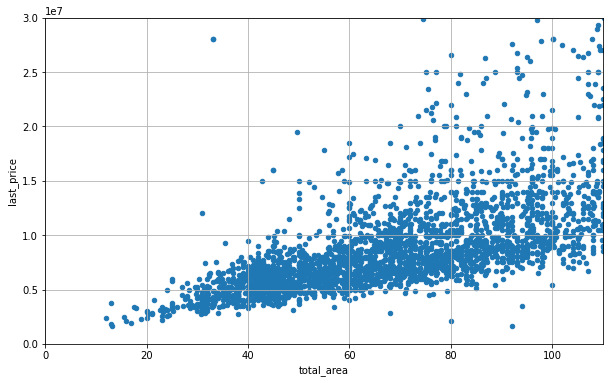

In [400]:
data_center.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(10, 6))
plt.xlim(0, 110)
plt.ylim(0, 30000000)

Как и по городу, наблюдается растянутость диаграммы вдоль оси Х. Площадь и цена растут не пропорционально, а колеблются вокруг медианы.

**Цена и комнаты**.

(-1.0, 12.0)

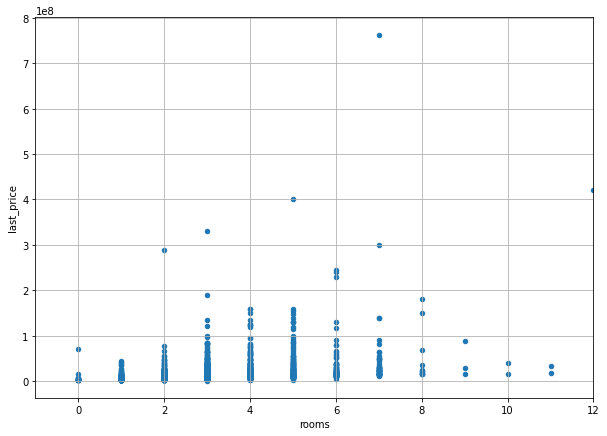

In [401]:
data_center.plot(x='rooms', y='last_price', kind='scatter', grid=True, figsize=(10, 7))
plt.xlim(-1, 12)

Та же ситуация, что и по городу. Рост цены, вплоть до пятикомнатных квартир, а потом спад.

**Этаж и стоимость**.

<AxesSubplot:xlabel='floor_category'>

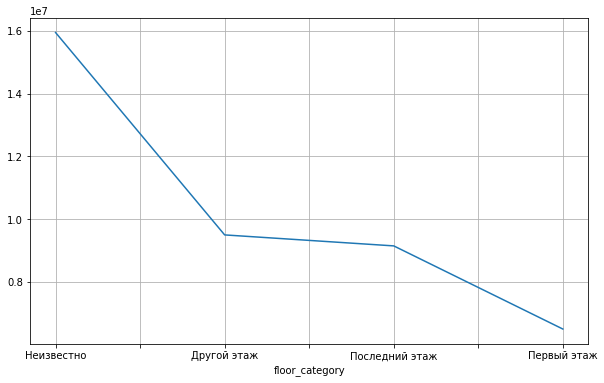

In [402]:
data_center.groupby('floor_category').last_price.median().sort_values(ascending=False).plot(grid=True, figsize=(10, 6))

Как и везде, первый этаж является самым недорогим. Однако, последние этажи в центре, не намного отличаются в цене от остальных этажей. Вид из окна последнего этажа в центре, намного живописнее такого-же в Кудрово. :)

Цена и **удалённость от центра**. Довольно странная метрика, раз мы и так уже в центре. Но, возможно, есть некий "центральный" центр. Проверим.

<AxesSubplot:xlabel='to_center_dist_km'>

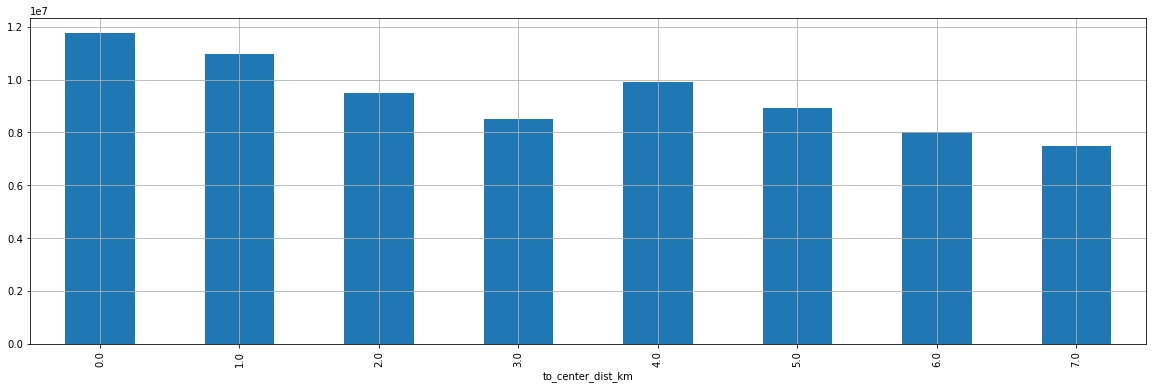

In [403]:
data_center.groupby('to_center_dist_km').last_price.median().plot(kind='bar', grid=True, figsize=(20, 6))

В пределах километра от условного "центра", цена выше. Однако, наблюдается подъём на четвёртом километре. Нужно брать Яндекс.Карты, или справочник-путеводитель и линейку и смотреть, что находится в этих пределах. 

Зависимость **цены от даты размещения**.

**Дни недели**.

<AxesSubplot:xlabel='week_day'>

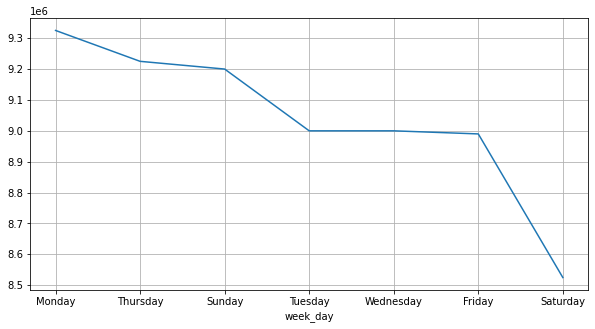

In [404]:
data_center.groupby('week_day').last_price.median().sort_values(ascending=False).plot(grid=True, figsize=(10, 5))

Покупаем по субботам, продаём по понедельникам. 


По городу была другая ситуация: в воскресенье выкладывались самые дешёвые квартиры, а во вторник - самые дорогие.


**Месяц**

<AxesSubplot:xlabel='month'>

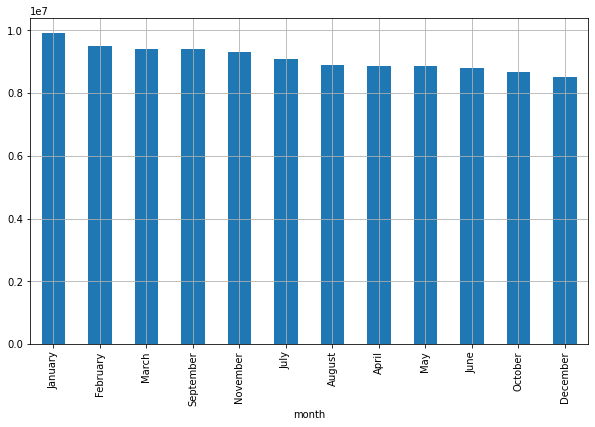

In [405]:
data_center.groupby('month').last_price.median().sort_values(ascending=False).plot(kind='bar', grid=True, figsize=(10, 6))

Предприимчивые жители центра, чтобы побыстрее продать квартиру и уехать на рождественские праздники, занижают цену в декабре. Но, отдохнув и набравшись новых сил, тут же завышают её в январе. 


В сравнении с городом, мы тоже наблюдаем падение цены к концу весны - началу лета.

**Год**

<AxesSubplot:xlabel='year', ylabel='last_price'>

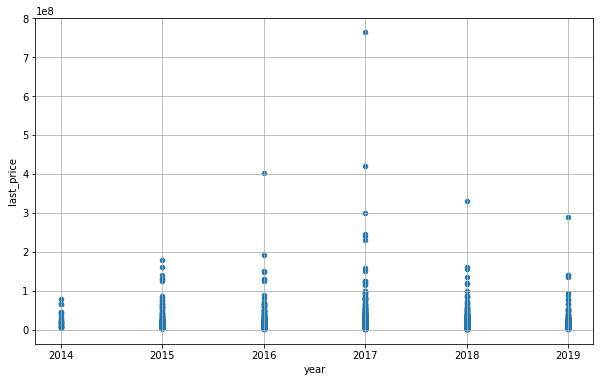

In [409]:
data_center.plot(x='year', y='last_price', kind='scatter', grid=True, figsize=(10, 6))

Тут ничего нового. С годами растёт не только количество объявлений, но и цена.

## Общий вывод

В нашем распоряжении оказался архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет - с 2014 по 2019 включительно.

Изучив общую информацию о данных, мы обнаружили и, впоследствии, исправили:

**-типы данных в строках**

**-строки с пропущенными значениями**

**-строки, где необходимо приведение к формату "дата-время"**

**-выбросы в данных**

Посчитали и добавили в таблицу:

**-цену квадратного метра**

**-день недели, месяц и год публикации объявления**

**-категорию этажа квартиры**

**-соотношение жилой и общей площади, а также отношение площади кухни к общей**

Изучили цену, площадь, число комнат и высоту потолков. 

Узнали влияние различных факторов на стоимость квартиры. Например - удалённость от центра. Также выделили область, в которую этот "центр" входит. 


Выделили топ-10 населённых пунктов, с наибольшим числом объявлений. Посчитали среднюю стоимость квадратного метра в них. 

Выбрали пункты с самой высокой и самой низкой стоимостью жилья. Как оказалось, Санкт-Петербург и его центр, не являются самыми дорогими. За покупку жилья на берегу Финского залива, на курортном направлении, с вас возьмут несколько больше.



## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. 
- [x] "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод